In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('california_housing.frame.csv')

In [16]:
df = df.iloc[:,1:]

In [9]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


Data descriptions. sklearn download. 1990 US Census. 20640 samples (sample units) each of which is a residential block in California. \
Target: MedHouseVal -- median house value in block, in USD100,000\
Features:\
MedInc --median of households in block, in $10,000\
HouseAge -- in years\
AveRooms -- average no. of rooms (all 'rooms') per household in block\
AveBedrms -- average no. of bedrooms per household in block\
Population -- total no. of occupants in block\
AveOccup -- average no. of occupants per household in block\
Longitudes -- smaller implies closer to sea

In [17]:
### MedHouseVal is censored at 5, i.e. numbers above 5 are reported as 5. This number is therefore inaccurate. Remove these.
df = df[df['MedHouseVal']<5]

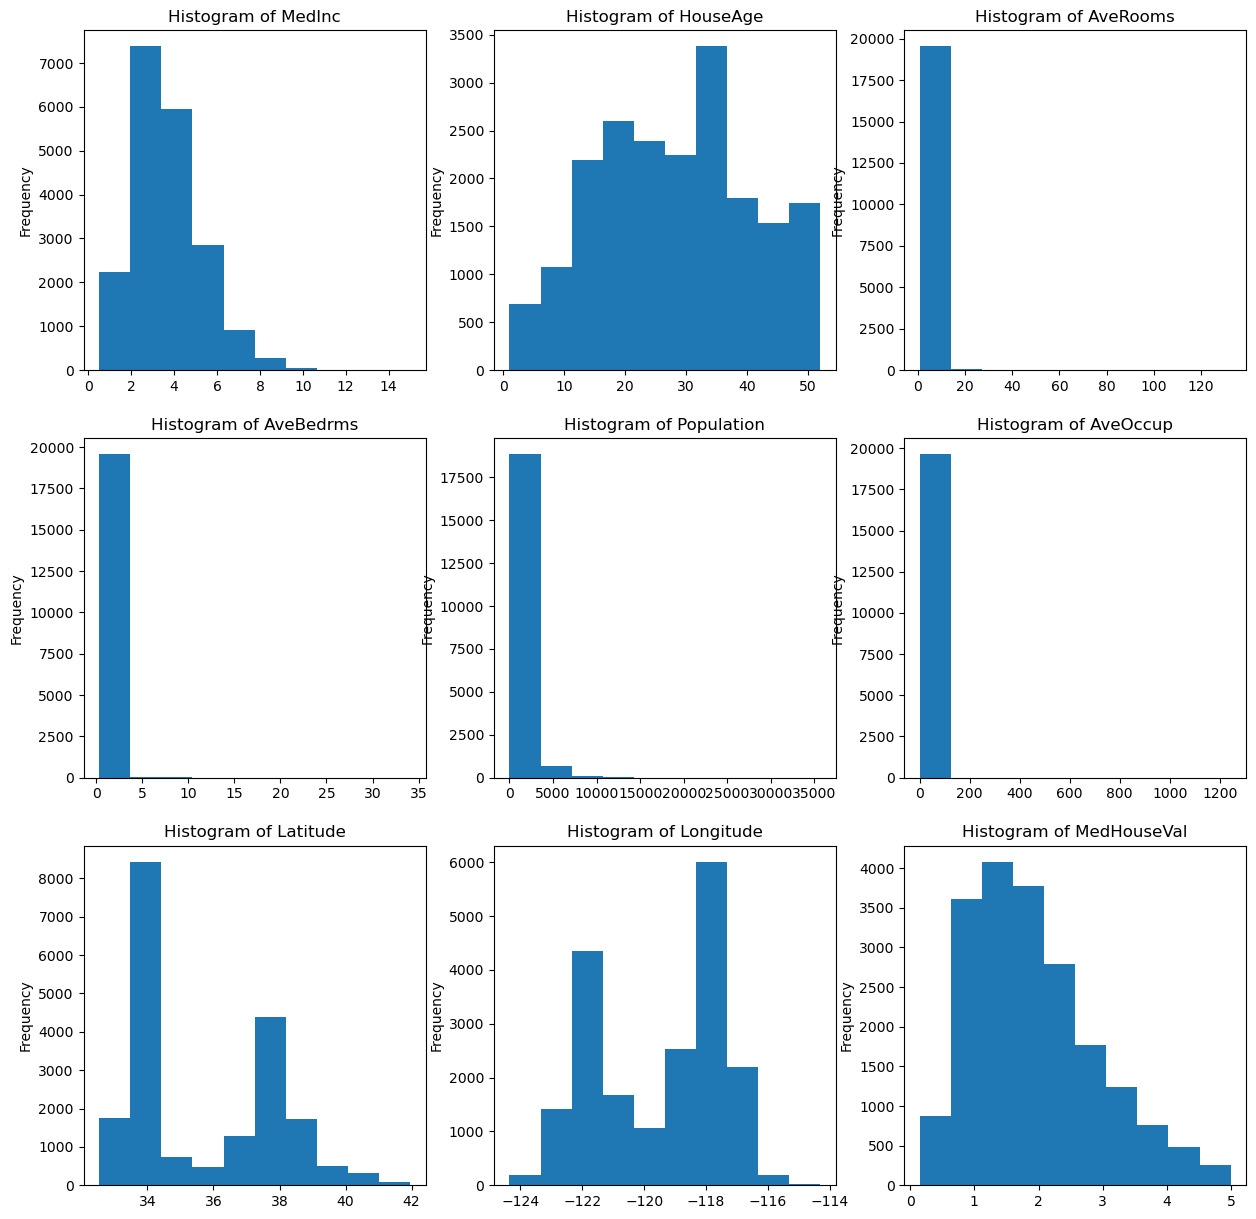

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust the figure size as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration

for i, col in enumerate(df.columns):
    df[col].plot(kind='hist', ax=axs[i], title=col)
    axs[i].set_title(f'Histogram of {col}')

Text(0.5, 1.0, 'Median house value versus their spatial location')

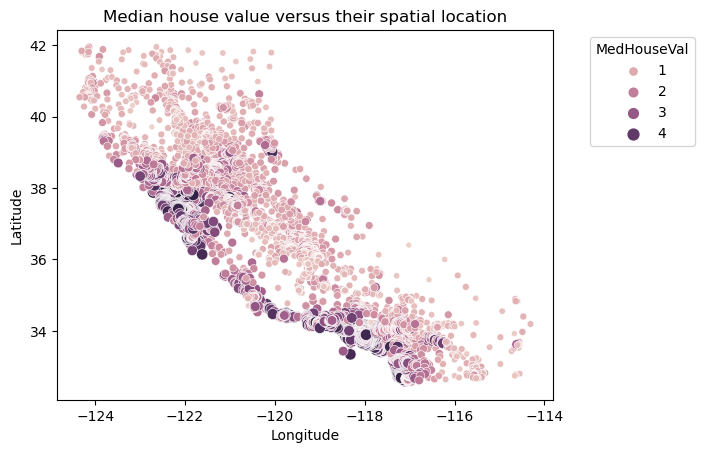

In [51]:
import seaborn as sns
sns.scatterplot(data=df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal")  # size of dot, hue color
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.3, 1))
plt.title("Median house value versus their spatial location")

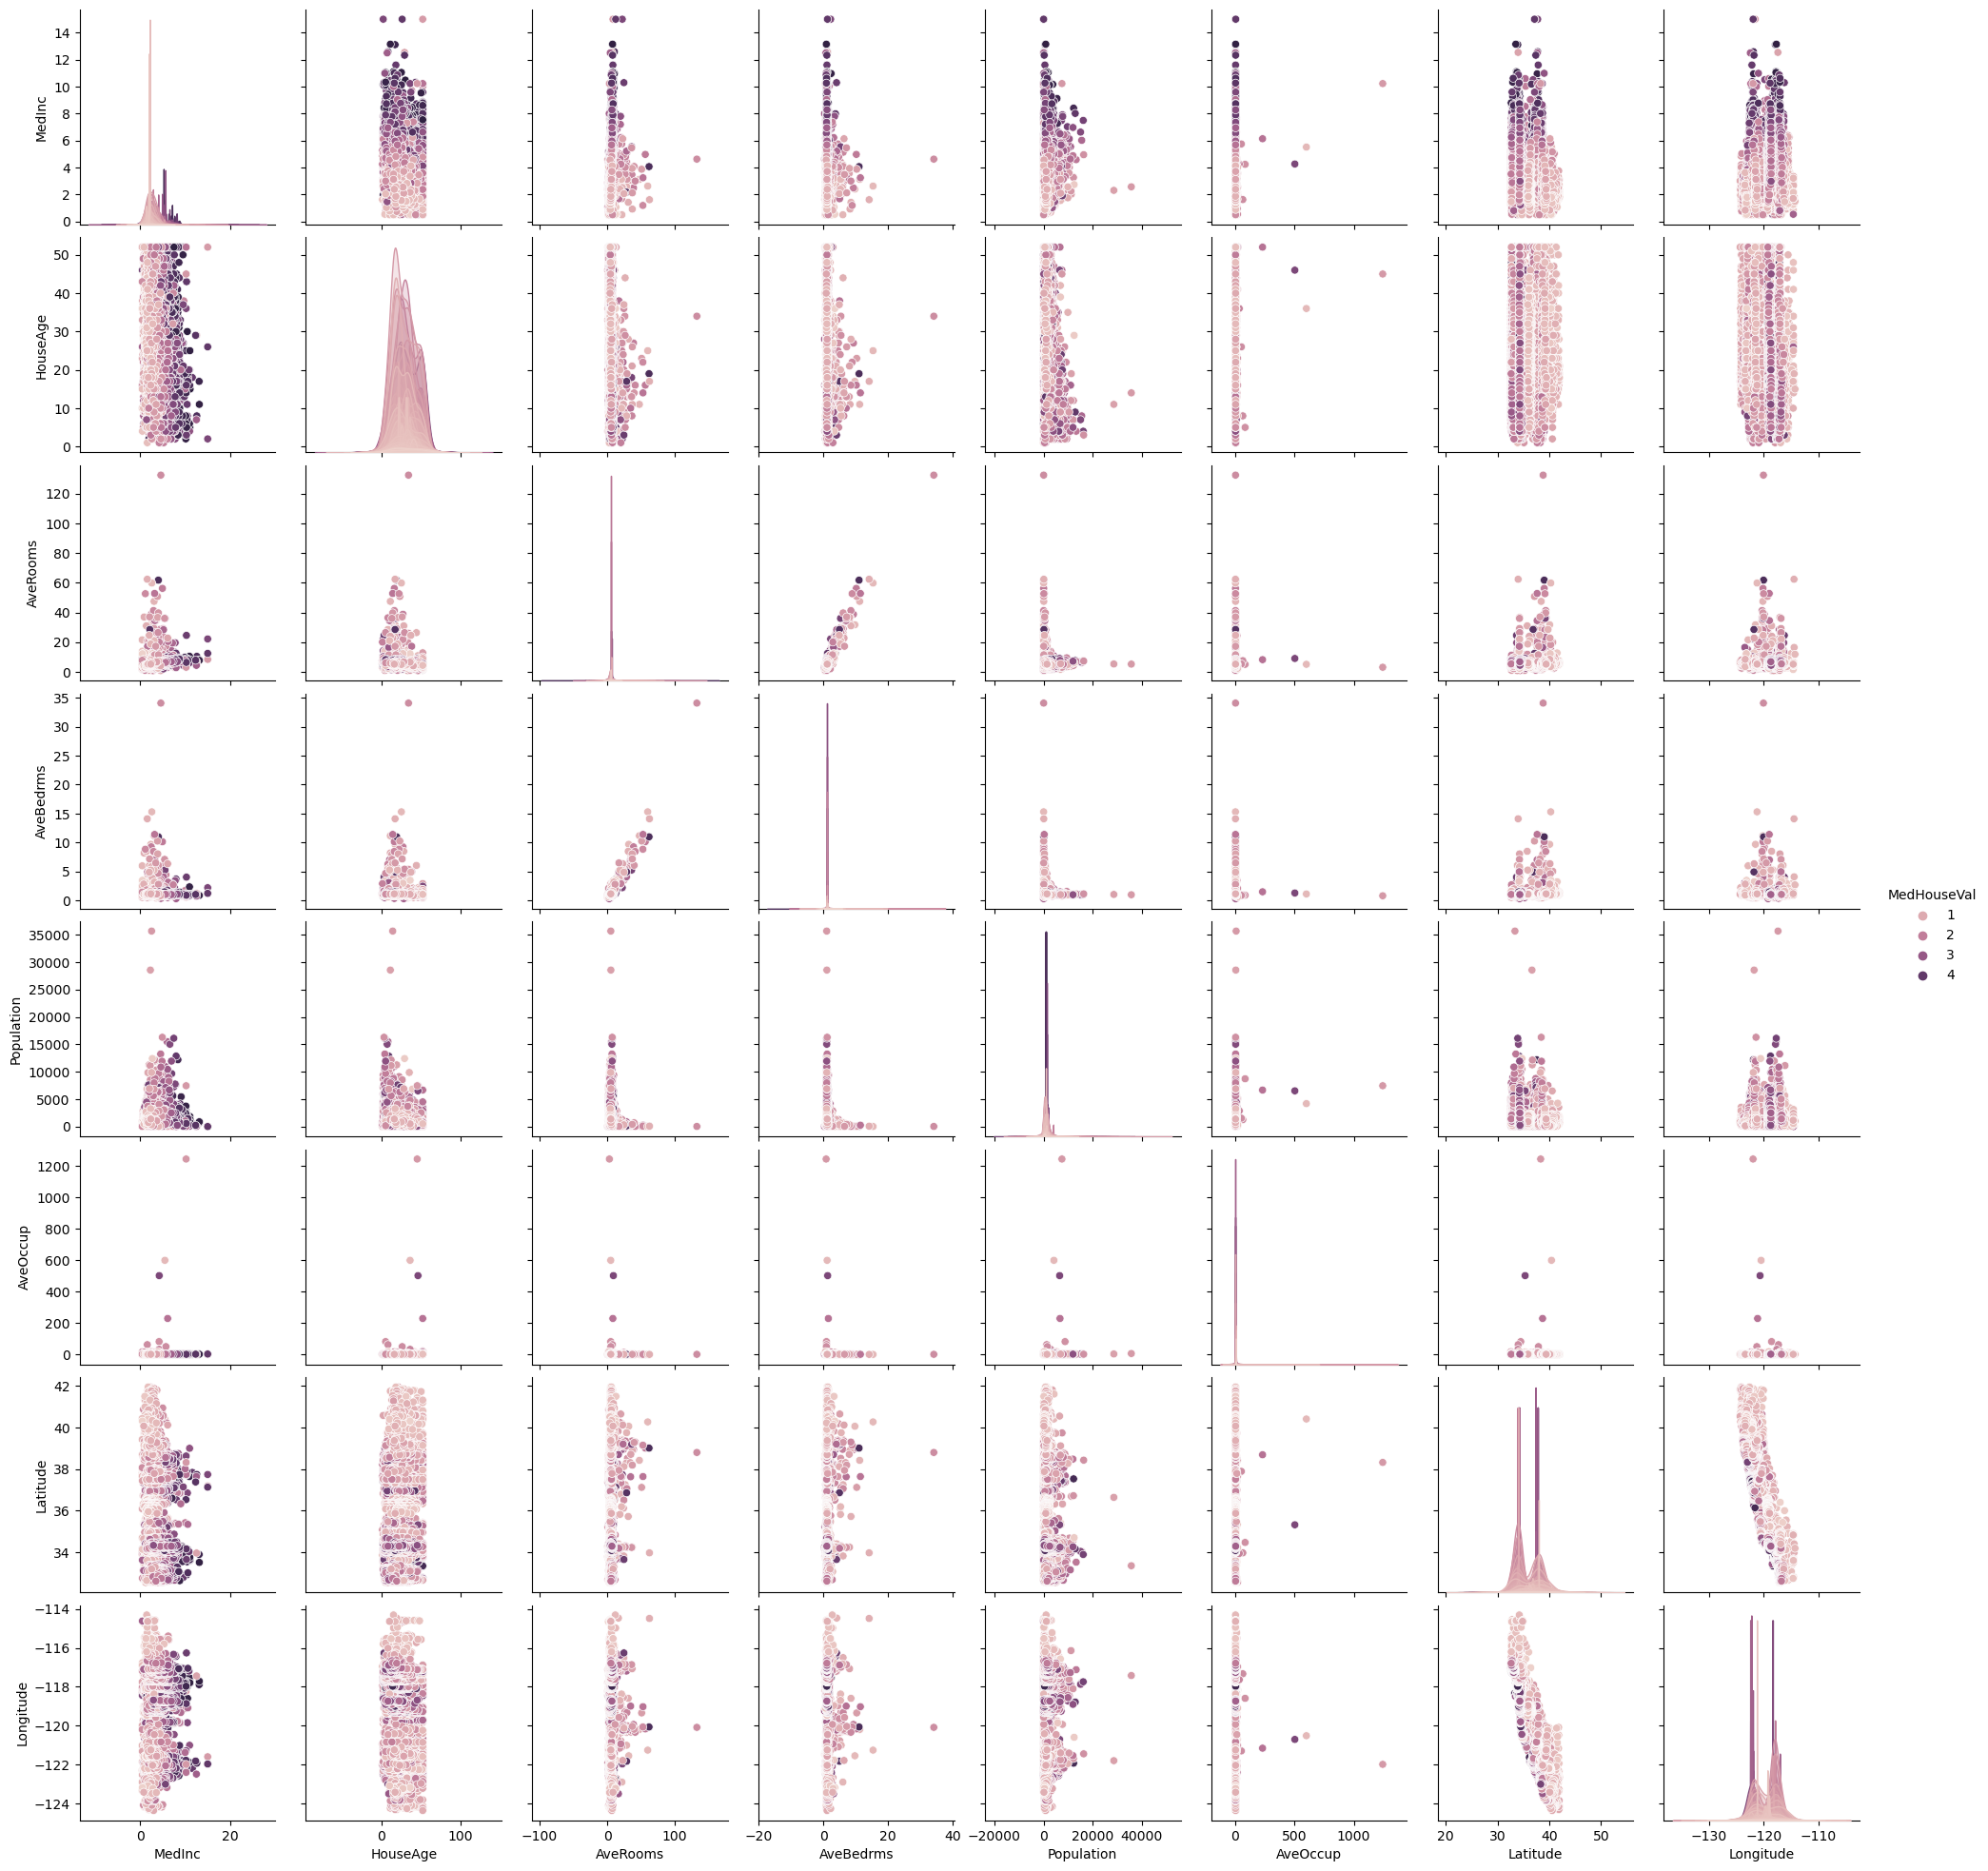

In [52]:
sns.pairplot(data=df, hue="MedHouseVal")

In [63]:
from sklearn import preprocessing
import numpy as np

# Sample 2x2 data
data = [[1,2,3],[5,10,15],[10,15,220]]
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)

print("Original data:\n", data)
print("Scaled data:\n", scaled_data)


Original data:
 [[1, 2, 3], [5, 10, 15], [10, 15, 220]]
Scaled data:
 [[0.         0.         0.        ]
 [0.44444444 0.61538462 0.05529954]
 [1.         1.         1.        ]]


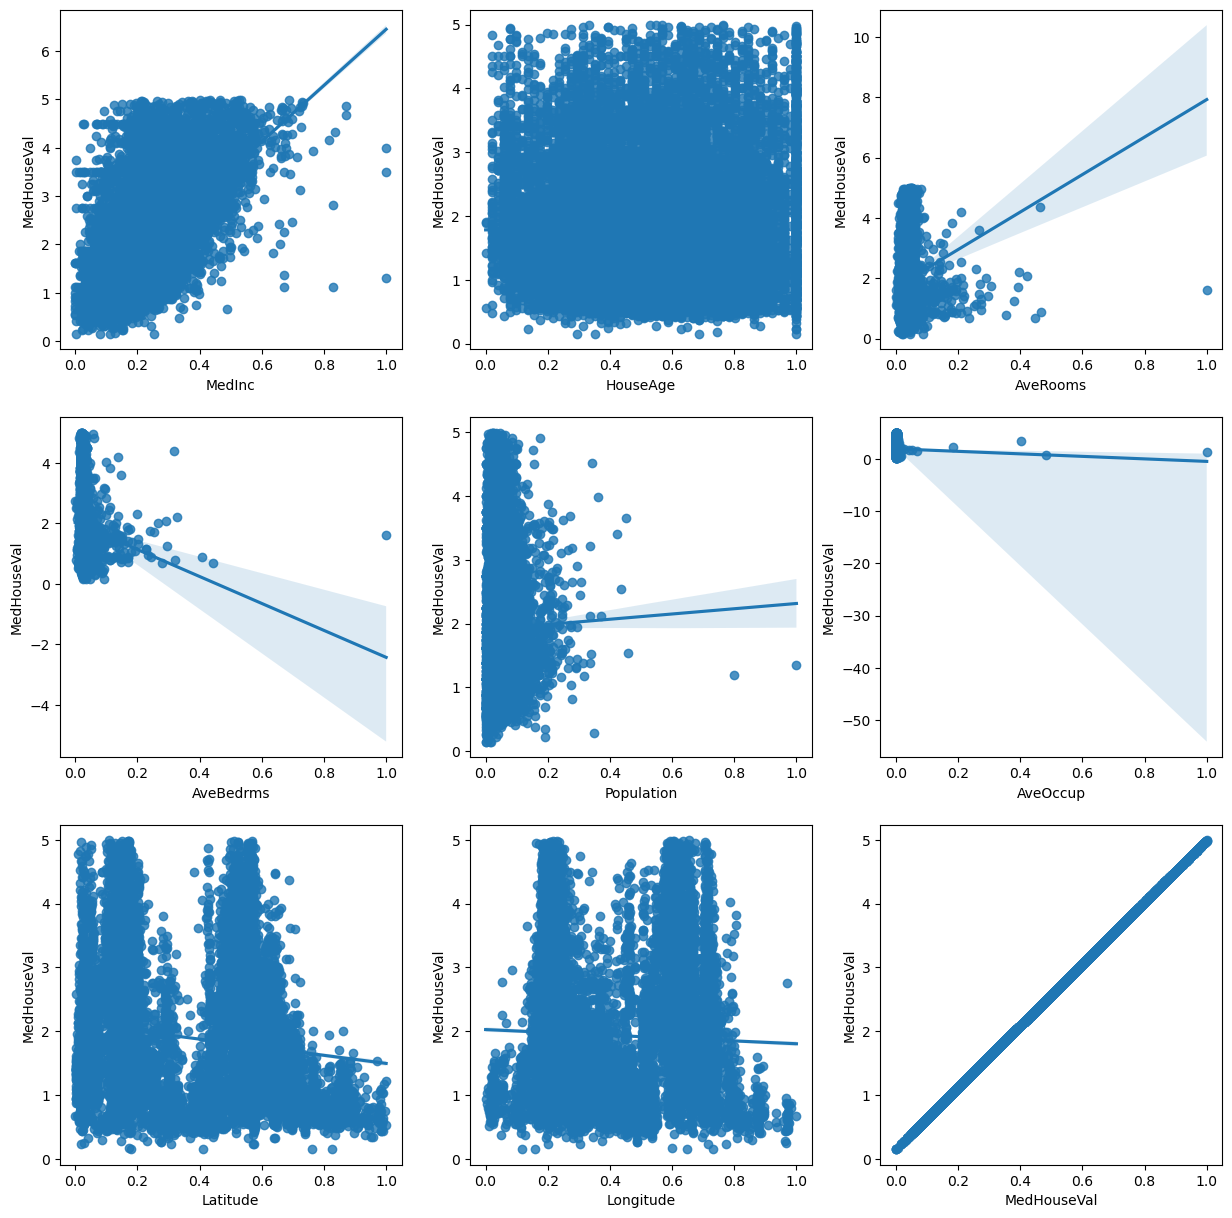

In [74]:
x = df
y = df['MedHouseVal']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns = df.columns)
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs=ax.flatten()
for i, k in enumerate(df.columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])

In [80]:
x = df.iloc[:,:-1]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [82]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
print('intercept (train) : ', linreg.intercept_)
print('\nslope(train) : ', linreg.coef_)

from sklearn.metrics import r2_score
y_pred_linreg_train = linreg.predict(x_train)
r2_score_linreg_train = r2_score(y_train, y_pred_linreg_train)

print('\nr2_score (train) : ', r2_score_linreg_train)

# y variable = med house val
# x var = all other col
# slope = slope coef for each x var
# r^2 score --> 57% total variation is explained by x var, 

intercept (train) :  -33.751933730335864

slope(train) :  [ 4.30121385e-01  8.36320226e-03 -1.07154274e-01  5.83494484e-01
  3.73545147e-06 -3.12045178e-03 -3.79140618e-01 -3.95674267e-01]

r2_score (train) :  0.5737709283126671


In [87]:
df.shape[0]*0.2

3929.6000000000004

In [95]:
d = np.arange(1,y_train.shape[0]+1)

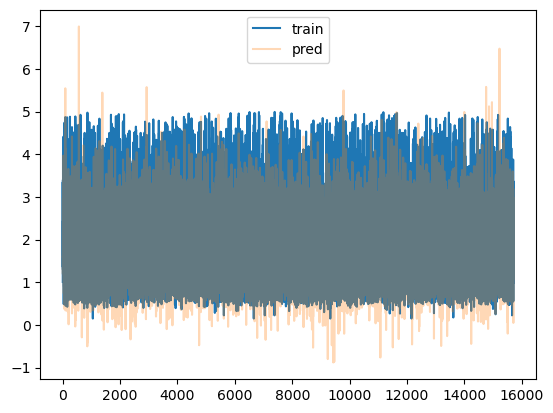

In [103]:
plt.plot(d, y_train, label='train')
plt.plot(d, y_pred_linreg_train, alpha=0.3, label='pred')
plt.legend()

# Regularised regression

In [106]:
from sklearn import linear_model
Ridge=linear_model.Ridge(alpha=.05,)
Ridge.fit(x_train, y_train) ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Ridge.intercept_)
### To retrieving the slope:
print('Slopes (train):', Ridge.coef_)

from sklearn.metrics import r2_score
y_pred_ridge_train = Ridge.predict(x_train)
### Fitting y using the x_train data
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

print('R2_score (train): ', r2_score_ridge_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): -33.751811979111885
Slopes (train): [ 4.30113841e-01  8.36324953e-03 -1.07141995e-01  5.83432633e-01
  3.73577162e-06 -3.12042804e-03 -3.79140770e-01 -3.95673527e-01]
R2_score (train):  0.5737709281745969


In [108]:
from sklearn import linear_model
Lasso=linear_model.Lasso(alpha=0.005,)
Lasso.fit(x_train, y_train) ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Lasso.intercept_)
### To retrieving the slope:
print('Slopes (train):', Lasso.coef_)

from sklearn.metrics import r2_score
y_pred_lasso_train = Lasso.predict(x_train)
### Fitting y using the x_train data
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

print('R2_score (train): ', r2_score_lasso_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): -33.06014351915506
Slopes (train): [ 4.06738481e-01  8.55535889e-03 -6.87269584e-02  3.92492664e-01
  4.97329377e-06 -3.01676701e-03 -3.76203814e-01 -3.89697620e-01]
R2_score (train):  0.5723837366087503


# K-fold cross-validation
- it is a statistical method to evaluate performance of predictive model
- process:
    - data splitting : training data is split into k folds
    - model training and validation : for each unique group, use one fold as validation data, and use remaining folds as training data. 
    - result: averaging result to produce a single estimation

In [116]:
from sklearn.model_selection import cross_val_score
scoresLinreg =cross_val_score(estimator=linreg, X=x_train, y=y_train, cv=5) # cv =num of folds
print(scoresLinreg)
print("%0.4f mean R2 with a standard deviation of %0.4f" % (scoresLinreg.mean(), scoresLinreg.std()))

[0.53308675 0.57063922 0.58518485 0.58882759 0.56063307]
0.5677 mean R2 with a standard deviation of 0.0200


In [118]:
Ridge=linear_model.Ridge(alpha=0.05,)
scoresRidge = cross_val_score(estimator = Ridge, X = x_train, y = y_train, cv = 5)
print(scoresRidge)
print("%0.4f mean R2 with a standard deviation of %0.4f" % (scoresRidge.mean(), scoresRidge.std()))

[0.53309691 0.57063858 0.5851844  0.58882781 0.5606321 ]
0.5677 mean R2 with a standard deviation of 0.0200


In [120]:
Lasso=linear_model.Lasso(alpha=0.005,)
scoresLasso = cross_val_score(estimator = Lasso, X = x_train, y = y_train, cv = 5)
print(scoresLasso)
print("%0.4f mean R2 with a standard deviation of %0.4f" % (scoresLasso.mean(), scoresLasso.std()))

[0.54740555 0.56793055 0.5828885  0.58838427 0.55686007]
0.5687 mean R2 with a standard deviation of 0.0154


In [122]:
OLSX = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
OLSy = df[['MedHouseVal']]

import statsmodels.api as sm
OLSX = sm.add_constant(OLSX)
 
result = sm.OLS(OLSy, OLSX).fit()
 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3312.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:29:44   Log-Likelihood:                -18913.
No. Observations:               19648   AIC:                         3.784e+04
Df Residuals:                   19639   BIC:                         3.792e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.5544      0.595    -56.352      0.0